# 1. Regression using Single-Layer Neural Network

In the first section of the assignment you will design your own regression model for function **Y = wX + b** using TensorFlow.
We start by setting up the problem for you.

In [ ]:
# We first import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# We define a callback function that populates 'predictions' with predicted ys for every epoch
predictions = []
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

# We then define the xs (inputs) and ys (outputs)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Let's understand the data. Plot and visualize the data (xs and ys).

***Hint***: Use plt.scatter()

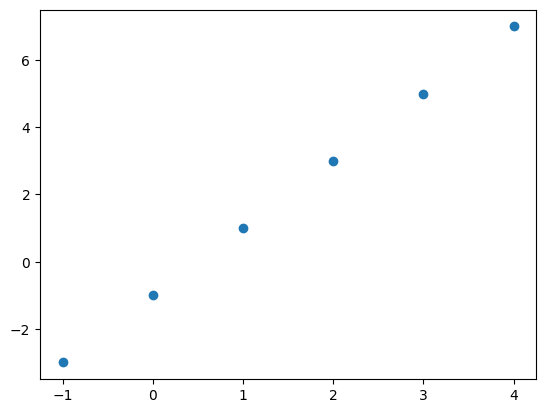

In [ ]:
# Visualize xs and ys
plt.scatter(xs,ys)
plt.show()

### Define Model

In the below cell, define your regression model - a single layer neural network with a dense layer - with appropriate shape, loss function and optimizer. You're free to choose the number of neuron units in the layer. Then compile the model.

In [ ]:
# Define Model and Compile it
single_layer = Dense(units=1, input_shape=[1])
model = Sequential([single_layer])
model.compile(optimizer='sgd', loss='mean_squared_error')
#print(single_layer.get_weights())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Model

We then fit the trained model to the training data.

In [ ]:
# We then fit the model
epochs = 300
print("Training!")
model.fit(xs, ys, epochs=epochs, callbacks=[callbacks], verbose=2)

Training!
Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 - 0s - 371ms/step - loss: 8.9947
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 - 0s - 91ms/step - loss: 7.2808
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 - 0s - 192ms/step - loss: 5.9283
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 - 0s - 284ms/step - loss: 4.8600
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 - 0s - 293ms/step - loss: 4.0156
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 - 0s - 327ms/step - loss: 3.3472
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 - 0s - 271ms/step - loss: 2.8176
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 - 0s - 308ms/step - loss: 2.3971
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 - 0s - 304ms/step - loss: 2.0625
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 - 0s - 295ms/step - loss: 1.7957
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 - 0s - 112ms/step - loss: 1.5822
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━

### Plot Loss graph

Use the ***predicted ys*** and the ***ground truth ys*** to manually calculate the MSE (mean-squared error) loss for each epoch. Then, plot the **loss vs epochs** graph, which should represent decreasing loss.

***Hint1:*** The shape of 'predictions' array is **(epochs, 6)** - this represents a 2D array of the 6 predicted Y values at every epoch. Each row represents the 6 predicted Y values.

***Hint2:*** Store the 'loss' as a 1D vector of size **(epochs)**. Each value will represent the MSE (of all 6 Ys) at each epoch.

Predictions array shape: (300, 6)
Ys Ground Truth shape:  (6,)
MSE loss shape:  (300,)


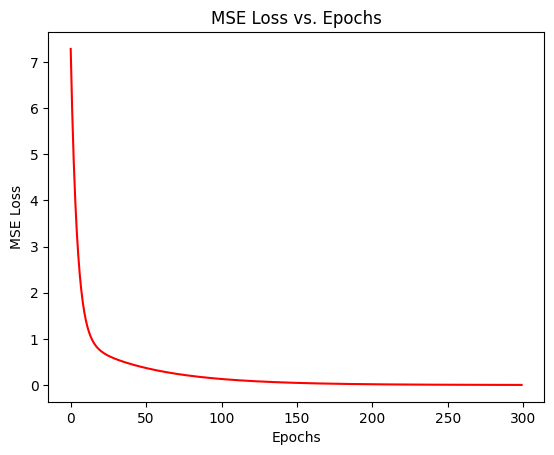

In [ ]:
predictions = np.asarray(predictions)
predictions = predictions.reshape(epochs, 6)
print("Predictions array shape:" ,predictions.shape)
print("Ys Ground Truth shape: ", ys.shape)

# Calculate MSE Loss and Plot Loss graph
mse_loss = []
for i in range (0,epochs):
  squared_diff = (ys - predictions[i]) ** 2
  mse = np.mean(squared_diff)
  mse_loss.append(mse)

mse_loss = np.array(mse_loss)

print("MSE loss shape: " ,mse_loss.shape)
#print("My loss is: " + str(mse_loss))

xaxis = range(epochs)
plt.plot(xaxis, mse_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('MSE Loss vs. Epochs')
plt.show()

Below is a plot of the resulting y predictions at EPOCH_NUMBERS = 1, 25, 50, 150, 300. If you'd like to see other predictions at other epochs, update the EPOCH_NUMBERS variable and re-run the cell!

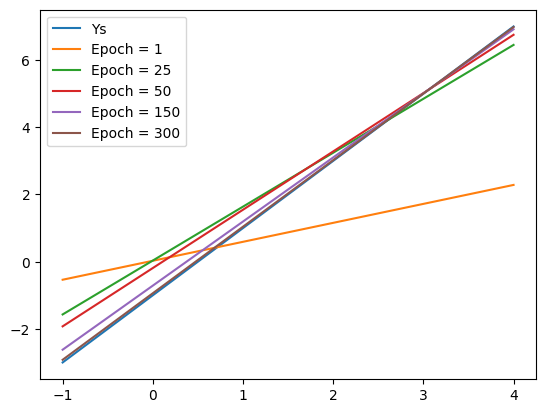

In [ ]:
EPOCH_NUMBERS=[1,25,50,150,300]
plt.plot(xs,ys,label = "Ys")
for EPOCH in EPOCH_NUMBERS:
    plt.plot(xs,predictions[EPOCH-1],label = "Epoch = " + str(EPOCH))
plt.legend()
plt.show()

# 2. Multiclass Classification using Dense Neural Network

In the second section of the assignment, you'll create a multi-layer Neural network with Dense layers for a Multi-class Classification problem.

We start by setting up the problem for you.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

You will be using the Fashion MNIST Dataset. - https://github.com/zalandoresearch/fashion-mnist. In the below cell, use the TensorFlow Keras API to load the datatset and split it into training and test sets.

In [ ]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Plot Sample Training Examples



---


Question 1: Plot the first 3 training images along with the training labels.



---



In [ ]:
#print("Training Images Shape: ", training_images.shape)

#Helper fxn to plot images
def show_training_image(img_index):
  plt.figure()
  plt.imshow(training_images[img_index])
  plt.title("Label: " + str(training_labels[img_index]))
  plt.grid(False)
  plt.show()

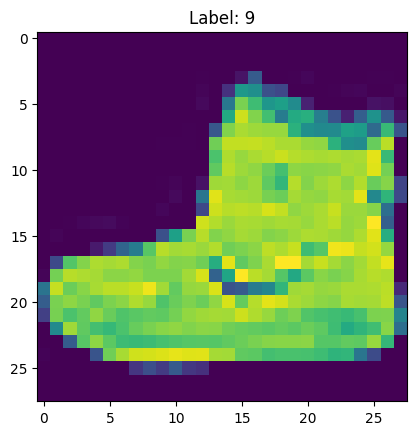

In [ ]:
# Plot 1st training example
show_training_image(0)

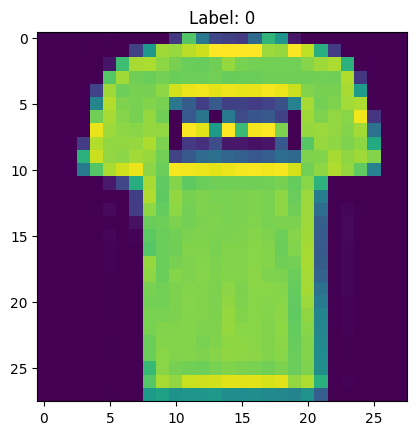

In [ ]:
# Plot 2nd training example
show_training_image(1)

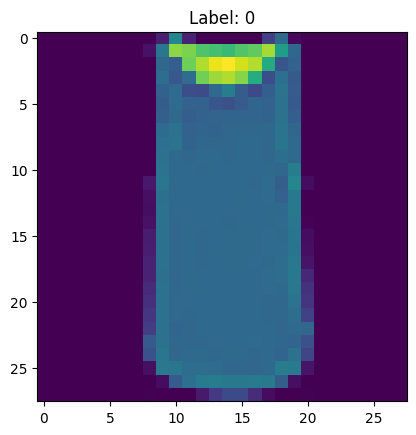

In [ ]:
# Plot 3rd training example
show_training_image(2)

### Define Model

We define the below model - a two-layer DNN (one hidden layer, output layer) - to take in the Fashion MNIST 28 x 28 grayscale image as input. This is in addition to the input layer. Can you detetrmine the number of neurons in the output layer?

In [ ]:
# Define the base model
print("We found the number of output neurons by executing \"max(training_labels) - min(training_labels) + 1\": ", max(training_labels) - min(training_labels) + 1)
No_Output_Neurons = 10
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(No_Output_Neurons, activation=tf.nn.softmax)])

We found the number of output neurons by executing "max(training_labels) - min(training_labels) + 1":  10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In the below cell, compile the above defined model with the appropriate Optimizer and Loss Function. Use accuracy as your metric.

Refer to the TensorFlow Documentation!

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train Model

Next, we fit the trained model to the training set. But before we do that, we must **preprocess our training and test images**!!

Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. Practitioners often use the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [ ]:
# Preprocess Training and Test Images

#Preprocess - Normalization:
training_images=training_images / 255.0
test_images=test_images / 255.0

# Check for no repeat normalization
if training_images.max() != 1 or test_images.max() != 1:
  raise Exception('Issue With Normalization', training_images.max(), test_images.max())
else:
  print("Normalization Executed as Intended...")

Normalization Executed as Intended...


Using these improved images, we train the model! Since this is a very simple dataset we only train for 5 epochs.



---


**Question 2:** Train the model for epochs = 5, 15, 20 and report the accuracies.

**Answer:**


1.   epochs = 5, training accuracy = 0.8950
2.   epochs = 15, training accuracy = 0.9174
3.   epochs = 20, training accuracy = 0.9422





---

In [ ]:
# fit the model to the training data

print("Training!")
model.fit(training_images, training_labels, epochs=5)

Training!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7903 - loss: 0.5942
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8681 - loss: 0.3594
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8802 - loss: 0.3267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8890 - loss: 0.2978
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8973 - loss: 0.2755


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like ~ 0.86 - 0.89 for epochs = 5. This tells you that your neural network is about 86 - 89% accurate in classifying the training data. i.e., it figured out a pattern match between the image and the labels that worked 86% - 89% of the time.

### Evaluate Model

How well would the model work with unseen data? That's why we have the test images. We can call ```model.evaluate```. It evaluates our model on the test images and compares the predictions to the actual test labels.

Refer TensorFlow Documentation to learn how to use the ```model.evaluate``` API.

In [ ]:
# Test the model on the test data

print("Testing!")
model.evaluate(test_images, test_labels)

Testing!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.3548


[0.35324788093566895, 0.8787000179290771]

The API returns a loss value followed by the test accuracy. You might get an accuracy of around 87 - 89% accuracy. Not Bad!



But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [ ]:
classifications = model.predict(test_images)
print("predictions:", classifications[0])    # probability distribution for predictions of first test image.
print("final prediction:", np.argmax(classifications[0]))      # final prediction - max probability
print("gound truth:", test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
predictions: [1.5323168e-07 1.6638360e-07 8.7691966e-08 6.8200773e-10 1.1583600e-07
 6.0761375e-03 3.2287173e-07 1.0954619e-01 1.2646003e-06 8.8437557e-01]
final prediction: 9
gound truth: 9


You can also visualize the results!

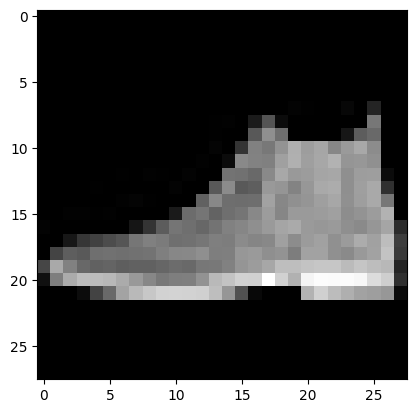

In [ ]:
plt.imshow(test_images[0], cmap='gray')

### Case 1 - Double number of Neurons in Hidden Dense Layer

In the below cell, define a model with double the number of neurons in the dense hidden layer. Then, compile the model, train the model on the training set, and evaluate the model on the test set.



In [ ]:
# Define model, compile, train, evaluate
#Define
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512*2, activation=tf.nn.relu), #double the number of neurons in the dense hidden layer
                                    tf.keras.layers.Dense(No_Output_Neurons, activation=tf.nn.softmax)])

#Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Test for Prexisting Normalization (this is our desired behavior)
if training_images.max() != 1 or test_images.max() != 1:
  raise Exception('Issue With Normalization', training_images.max(), test_images.max())
else:
  print("Normalization Already Occured (As Intended)...")

#Train
print("Training!")
model.fit(training_images, training_labels, epochs=5)

#Test
print("Testing!")
model.evaluate(test_images, test_labels)

Normalization Already Occured (As Intended)...
Training!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7919 - loss: 0.5798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8669 - loss: 0.3648
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8791 - loss: 0.3296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8893 - loss: 0.3003
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8968 - loss: 0.2784
Testing!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8770 - loss: 0.3483


[0.3523712754249573, 0.8730999827384949]



---



**Question 3:** Do you observe a difference in loss, accuracy, training time etc and if so list them down. Why do you think that's the case?

**Answer**:

There are marginal improvements in our loss & accuracy (note: the observed differences were greater in the testing accuracy/loss compared to the training accuracy/loss). These improvements are likely due to the innate increase in power with an increased number of neurons. We talked in lecture about how having an increased number of neurons in our hidden layers helps us achieve accurate models due to the randomization present in the initialization of the weights. Our training time (in ms/step), though, has increased significantly. We can reason that with a much larger number of weights, our training time will increase since we have to store and adjust more values during the training process.

_____________
###Original vs New loss, accuracy, & training time for 5 epochs###

_____________
###Training###
_____________
Original Loss (5 epochs): 0.2800

New Loss (5 epochs): 0.2765

_____________

Original Accuracy (5 epochs): 0.8950

New Accuracy (5 epochs): 0.8973

_____________

Original Training Time: ~8ms/step

New Training Time: ~14ms/step


_____________
###Testing###
_____________
Original Loss (5 epochs): 0.3612

New Loss (5 epochs): 0.3306

_____________

Original Accuracy (5 epochs): 0.8662

New Accuracy (5 epochs): 0.8759


---



### Case 2 - Include Additional Dense Layer

Consider the effects of additional layers in the network instead of just adding more neurons to the same layer.

In the below cell, define a model to add an additional layer with 128 neurons between the two existing Dense layers.

In [ ]:
# Define Similar Model as before with additional Layer

#Define
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), #Additional Layer Between the Two Pre-existing Dense Layers
                                    tf.keras.layers.Dense(No_Output_Neurons, activation=tf.nn.softmax)])

We then compile the model, fit the model to training data, and evaluate our model on the test data.

In [ ]:
# Compile fit and evaluate the model again

#Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Test for Prexisting Normalization (this is our desired behavior)
if training_images.max() != 1 or test_images.max() != 1:
  raise Exception('Issue With Normalization', training_images.max(), test_images.max())
else:
  print("Normalization Already Occured (As Intended)...")

#Train
print("Training!")
model.fit(training_images, training_labels, epochs=5)

#Test
print("Testing!")
model.evaluate(test_images, test_labels)

Normalization Already Occured (As Intended)...
Training!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7947 - loss: 0.5825
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8651 - loss: 0.3624
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8810 - loss: 0.3199
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8905 - loss: 0.2936
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8944 - loss: 0.2816
Testing!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8769 - loss: 0.3390


[0.33815622329711914, 0.8762000203132629]


---



**Question 4:** What happens to the error? How does this compare to the original model and the model with double the number of neurons?

**Answer**:

We can see, quite interestingly, that we get differing results for training vs. testing. In this new model, it clearly outperforms our original in both training and testing with regard to accuracy & loss metrics. We see, though, that the efficiency of this model is most apparent when considering our testing accuracy & loss. While the double neuron model outperforms this in training efficiency, this model far outperforms both previous models in testing efficiency. Ultimately, minimizing the error in the testing evaluation is crucial to the development of a model that is not overfitted to your training set and can work well in practice.
_____________
##Original vs Double Neuron vs New loss, accuracy, & training time for 5 epochs##

_____________
###Training###
_____________
Original Loss (5 epochs): 0.2800

Double Neuron Loss (5 epochs): 0.2765

New Loss (5 epochs): 0.2798

_____________

Original Accuracy (5 epochs): 0.8950

Double Neuron Accuracy (5 epochs): 0.8973

New Accuracy (5 epochs): 0.8954

_____________

Original Training Time: ~8ms/step

Double Neuron Training Time: ~14ms/step

New Training Time: ~9.5ms/step


_____________
###Testing###
_____________
Original Loss (5 epochs): 0.3612

Double Neuron Loss (5 epochs): 0.3306

New Loss (5 epochs): 0.3192

_____________

Original Accuracy (5 epochs): 0.8662

Double Neuron Accuracy (5 epochs): 0.8759

New Accuracy (5 epochs): 0.8835


---

# Callbacks

Sometimes if we set the model training for too many epochs we may find that training stops improving. In this case, it would be ideal to quit training early. TensorFlow has a function called ```Callbacks``` which can check the results from each epoch.

Below, we stop training the model when the accuracy is above 86%.

In [ ]:
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if( logs.get('accuracy') > 0.86):
      self.model.stop_training = True


callbacks = myCallback()


In the below cell, re-compile the model, re-fit the model to the training data and re-evaluate the model on the test data! Observe that the training process is much shorter!

**Note:** When you train the model, refer to the myCallback() class object.


***Hint:*** Use the callbacks flag in the `model.fit()` API

In [ ]:
# Re-compile, re-fit and re-evaluate

#Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Test for Prexisting Normalization (this is our desired behavior)
if training_images.max() != 1 or test_images.max() != 1:
  raise Exception('Issue With Normalization', training_images.max(), test_images.max())
else:
  print("Normalization Already Occured (As Intended)...")

#Train
print("Training!")
model.fit(training_images, training_labels, epochs=5, callbacks=[myCallback()]) #Added a Callback

#Test
print("Testing!")
model.evaluate(test_images, test_labels)

Normalization Already Occured (As Intended)...
Training!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7898 - loss: 0.5914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8636 - loss: 0.3695
Testing!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3765


[0.38201791048049927, 0.8575000166893005]